# K mean clustering (unsupervised machine learning)

In [48]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.model_selection import train_test_split 


In [73]:
df = pd.read_csv('live.csv')

In [50]:
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [74]:
df.dtypes

status_id            object
status_type          object
status_published     object
num_reactions         int64
num_comments          int64
num_shares            int64
num_likes             int64
num_loves             int64
num_wows              int64
num_hahas             int64
num_sads              int64
num_angrys            int64
Column1             float64
Column2             float64
Column3             float64
Column4             float64
dtype: object

In [75]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7045    False
7046    False
7047    False
7048    False
7049    False
Length: 7050, dtype: bool

In [53]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows:", duplicate_rows_df.shape)

number of duplicate rows: (51, 16)


In [54]:
df = df.drop_duplicates()

In [55]:
df.count()

status_id           6999
status_type         6999
status_published    6999
num_reactions       6999
num_comments        6999
num_shares          6999
num_likes           6999
num_loves           6999
num_wows            6999
num_hahas           6999
num_sads            6999
num_angrys          6999
Column1                0
Column2                0
Column3                0
Column4                0
dtype: int64

In [56]:
print(df.isnull().sum()) 

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             6999
Column2             6999
Column3             6999
Column4             6999
dtype: int64


In [57]:
df=df.drop(['Column1','Column2','Column3','Column4'],axis=1)

In [58]:
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


In [59]:
df=df.drop(['status_id','status_published'],axis=1)

In [60]:
df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0
7046,photo,16,0,0,14,1,0,1,0,0
7047,photo,2,0,0,1,1,0,0,0,0
7048,photo,351,12,22,349,2,0,0,0,0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6999 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    6999 non-null   object
 1   num_reactions  6999 non-null   int64 
 2   num_comments   6999 non-null   int64 
 3   num_shares     6999 non-null   int64 
 4   num_likes      6999 non-null   int64 
 5   num_loves      6999 non-null   int64 
 6   num_wows       6999 non-null   int64 
 7   num_hahas      6999 non-null   int64 
 8   num_sads       6999 non-null   int64 
 9   num_angrys     6999 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 601.5+ KB


# Declare feature vector and target variable


In [62]:
X = df
y = df['status_type']

# convert categorical variable into integers

In [63]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['status_type'] = le.fit_transform(X['status_type'])
y = le.transform(y)

In [64]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6999 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    6999 non-null   int64
 1   num_reactions  6999 non-null   int64
 2   num_comments   6999 non-null   int64
 3   num_shares     6999 non-null   int64
 4   num_likes      6999 non-null   int64
 5   num_loves      6999 non-null   int64
 6   num_wows       6999 non-null   int64
 7   num_hahas      6999 non-null   int64
 8   num_sads       6999 non-null   int64
 9   num_angrys     6999 non-null   int64
dtypes: int64(10)
memory usage: 601.5 KB


In [65]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


# Feature Scaling


In [66]:
cols = X.columns

In [67]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X = ms.fit_transform(X)

In [70]:
X = pd.DataFrame(X, columns=[cols])

In [71]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


In [72]:
X.tail()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
6994,0.333333,0.018896,0.000000,0.000000,0.018896,0.000000,0.0,0.000000,0.0,0.0
6995,0.333333,0.003397,0.000000,0.000000,0.002972,0.001522,0.0,0.006369,0.0,0.0
6996,0.333333,0.000425,0.000000,0.000000,0.000212,0.001522,0.0,0.000000,0.0,0.0
6997,0.333333,0.074522,0.000572,0.006425,0.074098,0.003044,0.0,0.000000,0.0,0.0
6998,0.333333,0.003609,0.000000,0.000000,0.003609,0.000000,0.0,0.000000,0.0,0.0


# k means MODEL PARAMETERS STUDY

In [76]:
from sklearn.cluster import KMeans
KMeans = KMeans(n_clusters= 2, random_state=0)
KMeans.fit(X) 

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [77]:
KMeans.cluster_centers_

array([[3.46167950e-01, 3.61833423e-02, 7.27812657e-04, 7.13272262e-04,
        3.57027040e-02, 1.99861691e-03, 2.13215566e-03, 1.16037081e-03,
        2.63163571e-03, 1.24915717e-03],
       [9.83564249e-01, 6.92281072e-02, 2.92995889e-02, 3.22130472e-02,
        6.10062518e-02, 5.16536230e-02, 8.90485655e-03, 1.05300588e-02,
        8.13397894e-03, 7.82133186e-03]])

In [78]:
KMeans.inertia_

231.09008425740083

#check quality of weak classification by the model

In [80]:
labels = KMeans.labels_
# check how many of the sample were correctly labeled
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 63 out of 6999 samples were correctly labeled.


In [81]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))


Accuracy score: 0.01


#use elbow method to find optimal number of cluster

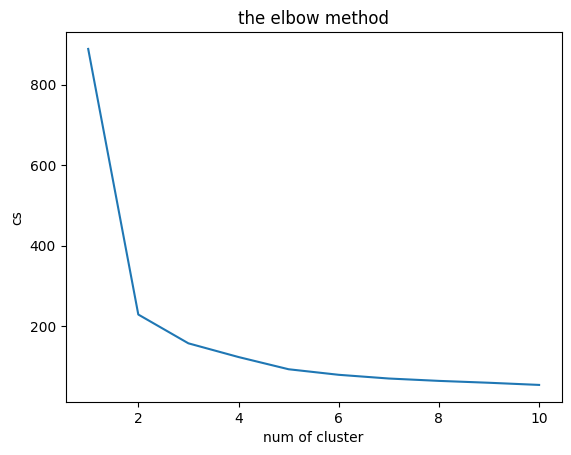

In [87]:
from sklearn.cluster import KMeans
cs = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init= 'k-means++', max_iter=300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1,11),cs)
plt.title('the elbow method')
plt.xlabel('num of cluster')
plt.ylabel('cs')
plt.show()

In [96]:
kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans.fit(X)
kmeans.cluster_centers_
kmeans.inertia_
labels = kmeans.labels_
# check how many of the sample were correctly labeled
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print((correct_labels/y.size)*100)


Result: 142 out of 6999 samples were correctly labeled.
2.028861265895128


In [92]:
kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(X)
kmeans.cluster_centers_
kmeans.inertia_
labels = kmeans.labels_
# check how many of the sample were correctly labeled
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print((correct_labels/y.size)*100)


Result: 99 out of 6999 samples were correctly labeled.
1.4144877839691383
